In [1]:
clear all;

global ipynb = 'binsum-alt';

source('clearest-nn.m');
source('utils-logging.m');
source('utils-training.m');

% log2file(tmp('log'));

##########################################

bits = 5;
printvar('bits');

function y = dectobin(x, n)
    y = dec2bin(x, n);
    y = y(:);
    y = str2num(y);
end

function x = bintodec(y)
    x = num2str(y);
    x = reshape(x, 1, []);
    x = bin2dec(x);
end

function [x, y] = binsum_sample(x1, x2, n)
    x = [dectobin(x1, n), dectobin(x2, n)]; 
    y = dectobin(x1 + x2, n+1);
end

function [X, Y] = binsum_samples(n)
    k = 2^n;
    m = k*k;
    X = zeros(n,  2,m);
    Y = zeros(n+1,1,m);
    i = 1;
    for x1 = 0:k-1 
        for x2 = 0:k-1
            [x,y] = binsum_sample(x1, x2, n);
            X(:,:,i) = x;
            Y(:,:,i) = y;
                  i += 1;
        end
    end
end

[X, Y] = binsum_samples(bits);
[X, Y] = shuffle(X, Y);
printsize('X');
printsize('Y');

function BBB = BATCHES(X, Y)
    BBB = {};
    m   = count(X);
    for i = 1:m
        B.X    = X(:, :, i);
        B.Y    = Y(:, :, i);
        BBB{i} = B;
    end
end

BBB = BATCHES(X, Y);
printsize('BBB');
printsize('BBB{1}.X');
printsize('BBB{1}.Y');
printvar('BBB{1}.X');
printvar('BBB{1}.Y');

function acc = TEST(CTX, BBB, show=0)
    bits = rows(BBB{1}.X);
    m    = count(BBB);
    acc  = 0;
    for i = 1:m
        B    = BBB{i};
        X    = B.X;
        y    = B.Y;
        z    = predict(CTX, X);
        z    = z > 0.5;
        y    = bintodec(y);
        z    = bintodec(z);
        eq   = y == z;
        acc += eq/m;
        if show
            x1 = bintodec(X(:,1));
            x2 = bintodec(X(:,2));
            if eq
                eq = '==';
            else       
                eq = '!='; 
            end
            fmt = sprintf("%%-%dd + %%-%dd = %%-%dd %%s %%-%dd\n", bits, bits, bits+1, bits+1);
            printlog(fmt, x1, x2, y, eq, z);
        end
    end
end

function CTX = LEARN(CTX, times=11, varargin)
    CTX = TUNE(CTX, varargin{:});
    BBB = evalin('caller', 'BBB');
    [CTX, ok] = TRAIN(CTX, BBB, times); 
    global ipynb;
    notifed = pushnotify(sprintf('%s: smth_learnt=%s', ipynb, bool2yesno(ok)))
    if ok
        save('-binary', tmp('ctx'), 'CTX');
    end
end

function printgated(CTX, ggg)
    gru = import(CTX, ggg).layers{1};
    ggu = gru.Gu.layers{1};
    ggr = gru.Gr.layers{1};
    ggc = gru.Gc.layers{1};
    gWu = ggu.W
    gbu = ggu.b
    gWr = ggr.W
    gbr = ggr.b
    gWc = ggc.W
    gbc = ggc.b
end


ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
OpenJDK 64-Bit Server VM warning: Archived non-system classes are disabled because the java.system.class.loader property is specified (value = "org.octave.OctClassLoader"). To use archived non-system classes, this property must be not be set
bits = 5
X = matrix [5 2 1024]
Y = matrix [6 1 1024]
BBB = cell [1 1024]
BBB{1}.X = matrix [5 2]
BBB{1}.Y = matrix [6 1]
BBB{1}.X = [1 1;1 0;1 0;0 1;1 0]
BBB{1}.Y = [1;0;1;1;1;1]


In [2]:
source('clearest-nn.m');

rand('state', 1);

% CTX = model(bits, {'recurrent', 4*bits}, {'dense', bits+1}, 'sigmoid');
CTX = model(bits, {'gated_recurrent', 8*bits}, {'dense', bits+1}, 'sigmoid');

CTX = optimization( CTX
%                   , {'L2_regularization', 0.001}
%                     , {'descent', 0.1}
                   , {'momentum', 0.1}
%                   , {'nesterov', 0.1}
%                  , {'adam', 0.1}
%                   , {'rprop', 0.1}
                  , {'gradient_clipping',0.9}
                  , 'stats'
                  );

CTX = objective(CTX, 'multitaskloss');

% load('-binary', tmp('ctx'), 'CTX');

printmodel('CTX');
printvar('CTX.num_p')


ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
CTX.layers{1}.unit = gated_recurrent
_.unit = gated_recurrent
_.Gu.layers = cell [1 2]
_.Gu.num_p = 1840
_.Gu.size_x = [45 1]
_.Gu.size_z = [40 1]
_.Gr.layers = cell [1 2]
_.Gr.num_p = 1840
_.Gr.size_x = [45 1]
_.Gr.size_z = [40 1]
_.Gc.layers = cell [1 2]
_.Gc.num_p = 1840
_.Gc.size_x = [45 1]
_.Gc.size_z = [40 1]
_.Sz = diagonal matrix [45 40]
_.Sx = matrix [45 5]
_.size_x = [5 1]
_.size_z = [40 1]
_.num_p = 5520
_.eps = 0.000000
_.cfg = cell [1 2]
CTX.layers{2}.unit = dense
_.unit = dense
_.W = matrix [6 40]
_.b = matrix [6 1]
_.size_x = [40 1]
_.size_z = [6 1]
_.num_p = 246
_.cfg = cell [1 2]
CTX.layers{3}.unit = sigmoid
_.unit = sigmoid
_.size_x = [6 1]
_.size_z = [6 1]
_.num_p = 0
_.cfg = sigmoid
CTX.optimizers{1}.unit = momentum
_.unit = momentum
_.rate = 0.100000
_.mu = 0.900000
_.ggg_ = matrix [5766 1]
_.cfg = cell [1 2]
CTX.optimizers{2}.unit = gradient_clipping
_.unit = gradient_clipping
_.maxnorm = 0.900000
_.cfg = cell 

In [ ]:
overall_accuracy = TEST(CTX, BBB, show=1);
printvar('overall_accuracy');

momentum.rate = 0.001000

starts_at = 10-Jun-2020 08:31:04
GRAD_DIFF = 0.000000
params_checked = 268

1: 4.076417            accuracy: 0.027344       gradient-norm: 0.005683  update-ratio: 0.000476   
10: 3.533065 ↓         accuracy: 0.052734       gradient-norm: 0.007166  update-ratio: 0.000514   

GRAD_DIFF = 0.000000
params_checked = 255
overall: objective ↓, accuracy ↑
ends_at = 10-Jun-2020 08:35:05

notifed = 1


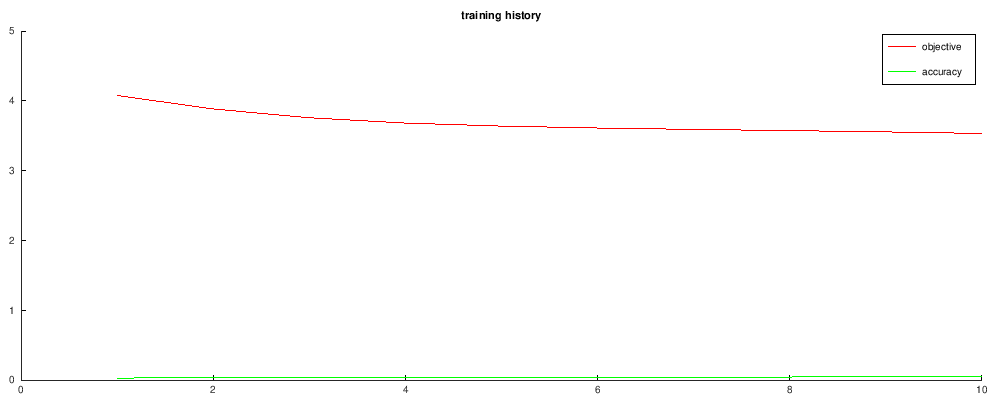

In [3]:
CTX = LEARN(CTX, times=10, {'momentum', 'rate', 0.001});

momentum.rate = 0.001000

starts_at = 10-Jun-2020 08:35:07
GRAD_DIFF = 0.000000
params_checked = 228

1: 3.505271            accuracy: 0.057617       gradient-norm: 0.007526  update-ratio: 0.000530   
66: 0.185059 ↓         accuracy: 0.992188       gradient-norm: 0.005429  update-ratio: 0.000148   
67: 0.197797 ↑         accuracy: 0.984375       gradient-norm: 0.024000  update-ratio: 0.000651   
73: 0.084399 ↓         accuracy: 1.000000       gradient-norm: 0.001718  update-ratio: 0.000045   

GRAD_DIFF = 0.000001
params_checked = 208
overall: objective ↓, accuracy ↑
ends_at = 10-Jun-2020 09:05:01

notifed = 1


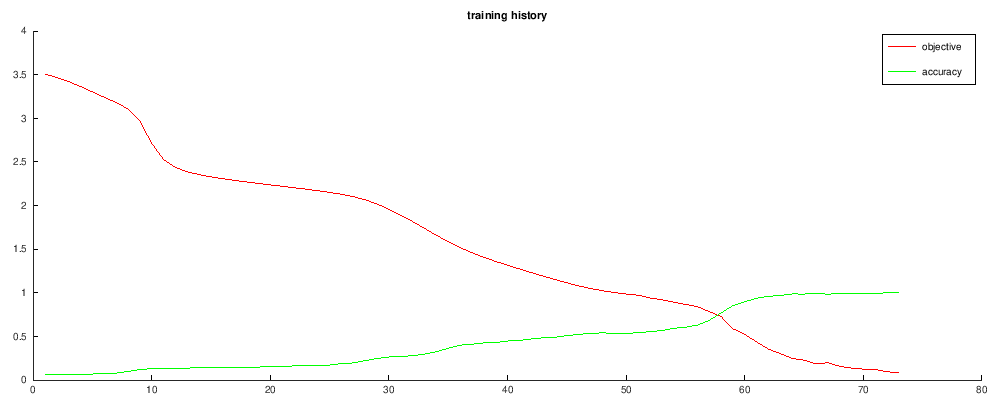

In [4]:
CTX = LEARN(CTX, times=100, {'momentum', 'rate', 0.001});

momentum.rate = 0.001000

starts_at = 10-Jun-2020 09:05:11
GRAD_DIFF = 0.000001
params_checked = 246

1: 0.077841            accuracy: 1.000000       gradient-norm: 0.001647  update-ratio: 0.000043   

GRAD_DIFF = 0.000004
params_checked = 197
overall: objective  , accuracy  
ends_at = 10-Jun-2020 09:05:45

notifed = 1


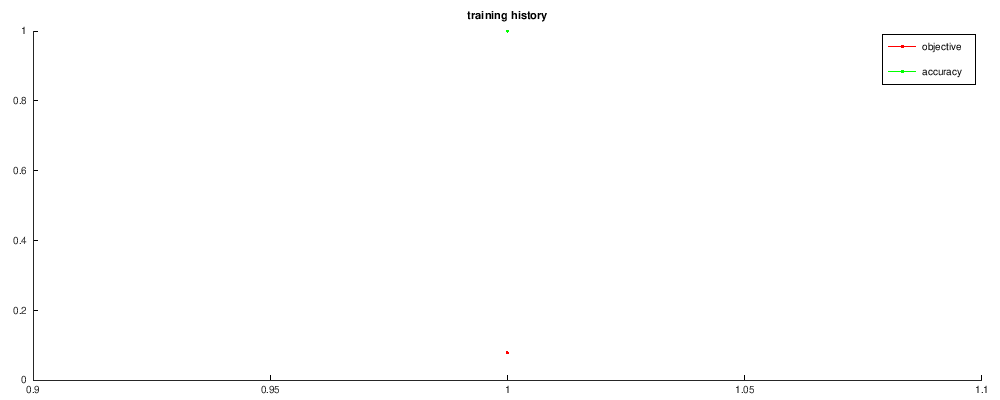

In [5]:
CTX = LEARN(CTX, times=100, {'momentum', 'rate', 0.001});

momentum.rate = 0.001000

starts_at = 10-Jun-2020 09:05:51
GRAD_DIFF = 0.000022
params_checked = 266

1: 0.072462            accuracy: 1.000000       gradient-norm: 0.001587  update-ratio: 0.000042   

GRAD_DIFF = 0.000000
params_checked = 281
overall: objective  , accuracy  
ends_at = 10-Jun-2020 09:06:25

notifed = 1


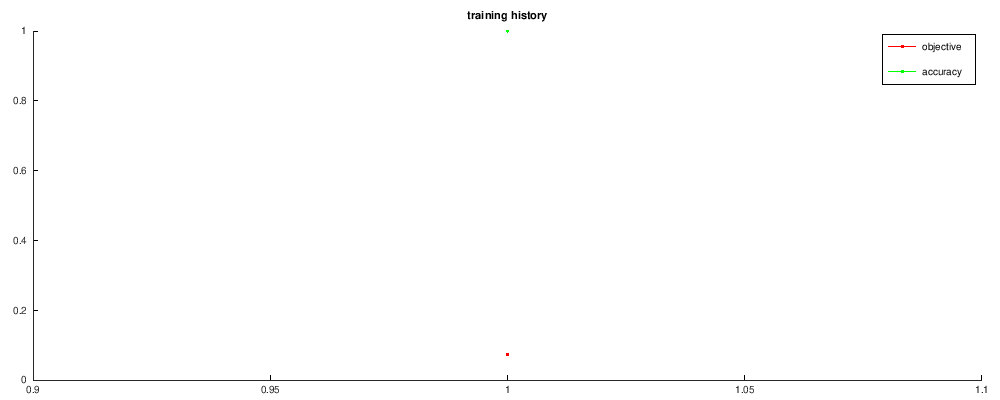

In [6]:
CTX = LEARN(CTX, times=100, {'momentum', 'rate', 0.001});

momentum.rate = 0.001000

starts_at = 10-Jun-2020 09:06:27
GRAD_DIFF = 0.000000
params_checked = 232

1: 0.067834            accuracy: 1.000000       gradient-norm: 0.001532  update-ratio: 0.000040   

GRAD_DIFF = 0.000001
params_checked = 232
overall: objective  , accuracy  
ends_at = 10-Jun-2020 09:07:02

notifed = 1


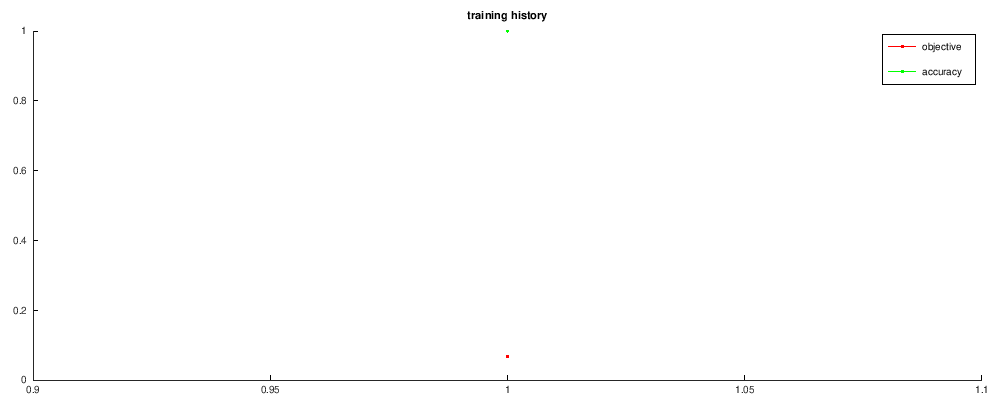

In [7]:
CTX = LEARN(CTX, times=100, {'momentum', 'rate', 0.001});

momentum.rate = 0.001000

starts_at = 10-Jun-2020 09:07:05
GRAD_DIFF = 0.000002
params_checked = 227

1: 0.063778            accuracy: 1.000000       gradient-norm: 0.001479  update-ratio: 0.000039   

GRAD_DIFF = 0.000001
params_checked = 237
overall: objective  , accuracy  
ends_at = 10-Jun-2020 09:07:42

notifed = 1


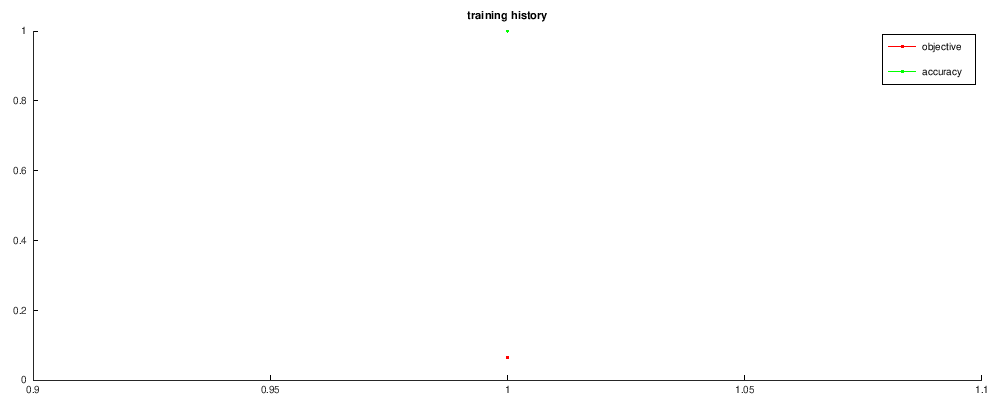

In [8]:
CTX = LEARN(CTX, times=100, {'momentum', 'rate', 0.001});

In [ ]:
[GRAD_DIFF, ggg, params_checked] = check_gradient(CTX, pick(BBB));
GRAD_DIFF
params_checked
printgated(CTX, ggg)

In [9]:
overall_accuracy = TEST(CTX, BBB, show=1);
printvar('overall_accuracy');

29    + 18    = 47     == 47    
20    + 11    = 31     == 31    
17    + 28    = 45     == 45    
23    + 8     = 31     == 31    
24    + 31    = 55     == 55    
28    + 0     = 28     == 28    
9     + 16    = 25     == 25    
2     + 17    = 19     == 19    
12    + 20    = 32     == 32    
26    + 18    = 44     == 44    
3     + 14    = 17     == 17    
13    + 12    = 25     == 25    
1     + 26    = 27     == 27    
7     + 31    = 38     == 38    
3     + 12    = 15     == 15    
1     + 12    = 13     == 13    
4     + 17    = 21     == 21    
25    + 12    = 37     == 37    
20    + 17    = 37     == 37    
14    + 7     = 21     == 21    
3     + 24    = 27     == 27    
17    + 12    = 29     == 29    
24    + 19    = 43     == 43    
0     + 27    = 27     == 27    
1     + 27    = 28     == 28    
7     + 22    = 29     == 29    
21    + 17    = 38     == 38    
5     + 23    = 28     == 28    
11    + 30    = 41     == 41    
19    + 3     = 22     == 22    
24    + 15

20    + 23    = 43     == 43    
15    + 25    = 40     == 40    
22    + 14    = 36     == 36    
20    + 4     = 24     == 24    
2     + 31    = 33     == 33    
27    + 24    = 51     == 51    
28    + 30    = 58     == 58    
24    + 11    = 35     == 35    
21    + 19    = 40     == 40    
31    + 14    = 45     == 45    
18    + 22    = 40     == 40    
1     + 10    = 11     == 11    
22    + 27    = 49     == 49    
0     + 26    = 26     == 26    
31    + 1     = 32     == 32    
13    + 21    = 34     == 34    
20    + 26    = 46     == 46    
29    + 29    = 58     == 58    
14    + 23    = 37     == 37    
5     + 3     = 8      == 8     
25    + 21    = 46     == 46    
7     + 25    = 32     == 32    
5     + 8     = 13     == 13    
21    + 29    = 50     == 50    
10    + 12    = 22     == 22    
28    + 25    = 53     == 53    
15    + 14    = 29     == 29    
26    + 25    = 51     == 51    
11    + 12    = 23     == 23    
9     + 4     = 13     == 13    
25    + 6 

14    + 17    = 31     == 31    
12    + 3     = 15     == 15    
17    + 11    = 28     == 28    
5     + 17    = 22     == 22    
18    + 30    = 48     == 48    
19    + 28    = 47     == 47    
0     + 9     = 9      == 9     
3     + 2     = 5      == 5     
31    + 29    = 60     == 60    
28    + 15    = 43     == 43    
19    + 25    = 44     == 44    
16    + 26    = 42     == 42    
11    + 17    = 28     == 28    
16    + 2     = 18     == 18    
30    + 6     = 36     == 36    
19    + 22    = 41     == 41    
21    + 30    = 51     == 51    
18    + 19    = 37     == 37    
3     + 3     = 6      == 6     
27    + 1     = 28     == 28    
5     + 10    = 15     == 15    
29    + 1     = 30     == 30    
27    + 20    = 47     == 47    
0     + 0     = 0      == 0     
14    + 24    = 38     == 38    
11    + 8     = 19     == 19    
15    + 23    = 38     == 38    
15    + 22    = 37     == 37    
26    + 1     = 27     == 27    
6     + 20    = 26     == 26    
2     + 7 

3     + 13    = 16     == 16    
27    + 30    = 57     == 57    
0     + 24    = 24     == 24    
9     + 27    = 36     == 36    
1     + 5     = 6      == 6     
12    + 22    = 34     == 34    
20    + 9     = 29     == 29    
24    + 23    = 47     == 47    
21    + 31    = 52     == 52    
14    + 8     = 22     == 22    
5     + 12    = 17     == 17    
16    + 9     = 25     == 25    
0     + 23    = 23     == 23    
1     + 16    = 17     == 17    
30    + 17    = 47     == 47    
24    + 24    = 48     == 48    
17    + 30    = 47     == 47    
27    + 28    = 55     == 55    
29    + 8     = 37     == 37    
7     + 9     = 16     == 16    
0     + 21    = 21     == 21    
29    + 17    = 46     == 46    
12    + 5     = 17     == 17    
27    + 21    = 48     == 48    
25    + 15    = 40     == 40    
9     + 25    = 34     == 34    
12    + 28    = 40     == 40    
13    + 25    = 38     == 38    
12    + 12    = 24     == 24    
30    + 1     = 31     == 31    
30    + 7 

12    + 23    = 35     == 35    
12    + 25    = 37     == 37    
3     + 4     = 7      == 7     
21    + 9     = 30     == 30    
16    + 6     = 22     == 22    
0     + 6     = 6      == 6     
19    + 7     = 26     == 26    
31    + 0     = 31     == 31    
21    + 8     = 29     == 29    
17    + 19    = 36     == 36    
15    + 30    = 45     == 45    
9     + 11    = 20     == 20    
22    + 4     = 26     == 26    
27    + 22    = 49     == 49    
22    + 15    = 37     == 37    
1     + 4     = 5      == 5     
31    + 4     = 35     == 35    
4     + 24    = 28     == 28    
5     + 16    = 21     == 21    
21    + 14    = 35     == 35    
22    + 29    = 51     == 51    
20    + 16    = 36     == 36    
10    + 15    = 25     == 25    
17    + 15    = 32     == 32    
11    + 10    = 21     == 21    
25    + 16    = 41     == 41    
26    + 21    = 47     == 47    
20    + 19    = 39     == 39    
20    + 6     = 26     == 26    
9     + 30    = 39     == 39    
27    + 23

In [ ]:
source('clearest-nn.m');

DDD = zeros(CTX.num_p, 1);
for i = 1:count(BBB)
    batch_num = i
    B = BBB{i}
    %printall(CTX, B.X, B.Y);
    [CTX, ggg, E, acc] = pretrain(CTX, B.X, B.Y);
    ggg;
    E;
    acc;
    printgated(CTX, ggg)
    [GRAD_DIFF, ddd, params_checked] = check_gradient(CTX, B);
    DDD += abs(ddd);
    printf('\n')
end

printgated(CTX, DDD);
